In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.optimize import minimize  # for optimization

In [2]:
def J(theta):
    return (theta[0] - 5) ** 2 + (theta[1] - 5) ** 2

In [31]:
t0 = np.linspace(-10, 10, 100)
t1 = np.linspace(-10, 10, 100)

T0, T1 = np.meshgrid(t0, t1)
Z = (T0 - 5) ** 2 + (T1 - 5) ** 2

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T0, T1, Z, cmap=plt.cm.rainbow)
cset = ax.contour(T0, T1, Z, 20, zdir='Z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
cset = plt.contour(T0, T1, Z, 20, zdir='Z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [36]:
minimize(J, x0=[0, 0], method='CG')

     fun: 2.4774723757749714e-18
     jac: array([1.71271317e-08, 1.71271317e-08])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([5., 5.])

In [45]:
minimize(J, x0=np.random.randn(2), method='CG')

     fun: 6.238475006745089e-16
     jac: array([-1.85031954e-08, -2.22409842e-08])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([4.99999998, 4.99999998])

In [46]:
result = minimize(J, x0=np.random.randn(2), method='CG')
result.x  

array([4.99999999, 4.99999999])

In [47]:
minimize(J, x0=[0, 0], method='BFGS')

      fun: 3.5538794606501983e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([-1.17592194e-08, -1.17592194e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.99999999, 4.99999999])

In [48]:
def gradients(theta):
    return np.array([2 * (theta[0] - 5), 2 * (theta[1] - 5)])

In [49]:
gradients([5, 5])

array([0, 0])

In [50]:
minimize(J, x0=np.random.randn(2), method='CG', jac=gradients)

     fun: 1.6884862638500213e-17
     jac: array([-4.78492090e-09, -6.68161526e-09])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([5., 5.])

In [51]:
minimize(J, x0=np.random.randn(2), method='TNC', jac=gradients)

     fun: 4.261722728601967e-14
     jac: array([2.74677340e-07, 3.08255199e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 5
     nit: 2
  status: 0
 success: True
       x: array([5.00000014, 5.00000015])

### another practice with Rosen Function 
#### sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0) 
#### The Rosenbrock function has a global minimum at (1,1,1,.....1) where f(x,y)=0. Many optimization algorithms are tested using this function to evaluate their performance in finding the minimum. 
#### $ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100 \cdot (x_{i+1} - x_i^2)^2 + (1 - x_i)^2\right]$

In [ ]:
import numpy as np
from scipy.optimize import rosen
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, x)
Z = rosen([X, Y])
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
cset = plt.contourf(X, Y, rosen([X, Y]), 20, zdir='Z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [67]:
minimize(rosen, x0=np.random.randn(2), method='TNC')

     fun: 7.75010969013202e-09
     jac: array([-8.20644947e-06, -8.08388805e-05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 156
     nit: 15
  status: 1
 success: True
       x: array([0.99991206, 0.99982372])

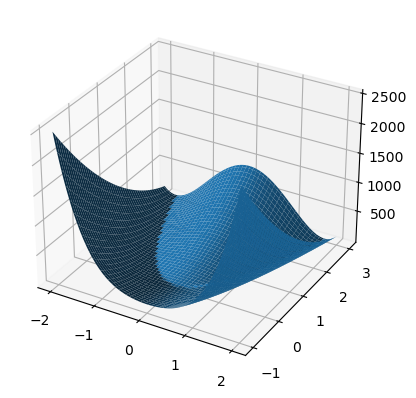

In [71]:
def rosenbrock(x, y):
    return 100.0 * (y - x**2.0)**2.0 + (1 - x)**2.0

def rosenbrock_gradient(x):
    n = len(x)
    gradient = np.zeros_like(x)

    for i in range(n - 1):
        gradient[i] = -400 * x[i] * (x[i + 1] - x[i]**2) - 2 * (1 - x[i])
        gradient[i + 1] = 200 * (x[i + 1] - x[i]**2)

    return gradient

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)

X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)


ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()